# 1. 탐색: 데이터의 기초 정보 살펴보기

- country : 국가 정보 
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_litres_of_pure_alcohol : 총 알코올 소비량
- continent : 국가의 대륙 정보


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drinks = pd.read_csv('./drinks.csv')
print(drinks.info())
print('*' * 40)
print(drinks.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
****************************************
       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138          

In [6]:
# continent에 결측데이터 23개 존재 

# 나머지 피처의 수치 정보 확인
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
# 결측 데이터 전처리 진행하기
# 결측 데이터 continent 23개는 AA 로 분류 

drinks['continent'] = drinks['continent'].fillna('AA')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,AA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


### 상관관계 분석해보기
- 단순 상관 분석
- 다중 상관 분석

상관분석 : 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것. 상관 계수를 구하는 것은 공분산의 개념을 포함한다. 공분산은 2개의 확률 변수에 대한 상관 정도로, 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸 것이다. 하지만 공분산만으로 두 확률 변수의 상관 관계를 구한다면 두 변수의 단위 크기에 영향을 받을 수 있습니다. 따라서 이를 -1과 1사이의 값으로 변환합니다. 이를 상관 계수라고 합니다. -1에 가까울수록 음의 상관 관계가 있다는 것을 뜻한다. 

In [10]:
# 여러 피처의 상관 관계 분석하고 이를 시각화 해보기

aaa = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[aaa].corr(method = 'pearson')

print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


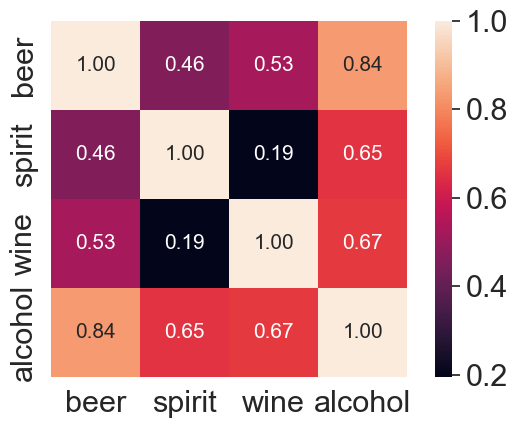

In [14]:
import seaborn as sns

cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale = 2)
hitmap = sns.heatmap(corr.values,
                    cbar = True,
                    annot = True,
                    square = True,
                    fmt = '.2f',
                    annot_kws = {'size' : 15},
                    xticklabels = cols_view,
                    yticklabels = cols_view)

plt.tight_layout()
plt.show()

In [17]:
# beer 소비량과 총 알코올 소비량과 큰 상관관계가 있다는 것을 볼 수 있다.

# AA (기타국가)가 얼마나 있는지 pie 차트로 시각화하기 
labels = drinks['continent'].value_counts().index.tolist()
print(labels)
fracs = drinks['continent'].value_counts().values.tolist()  # 오름차순(디폴트)정렬
print(fracs)


['AF', 'EU', 'AS', 'AA', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


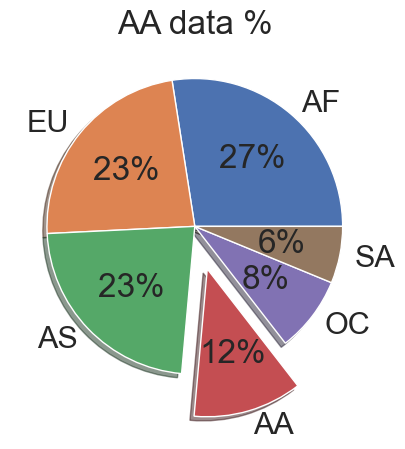

In [22]:
# 기타 대륙를 explode 변수를 통해 티나게 그림을 그리기, 조각분리
explode = (0,0,0,0.3,0,0)
plt.pie(fracs , explode = explode , labels=labels, autopct= '%.0f%%', shadow = True)
plt.title('AA data %')
plt.show()

In [25]:
# 12%가 AA (기타국가)로 분류 된 것을 알 수 있다.

# 대륙별 spirit_seivings, wine_spirit 평균, 최대,최소,합계를 계산하자

result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
print(result.head(6))

result1 = drinks.groupby('continent').wine_servings.agg(['mean','min','max','sum'])
print(result1.head(6))

                 mean  min  max   sum
continent                            
AA         165.739130   68  438  3812
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
SA         114.750000   25  302  1377
                 mean  min  max   sum
continent                            
AA          24.521739    1  100   564
AF          16.264151    0  233   862
AS           9.068182    0  123   399
EU         142.222222    0  370  6400
OC          35.625000    0  212   570
SA          62.416667    1  221   749


## 1번 문제 답
![nn](pr1.png)

In [28]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙은?

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
overmean = continent_mean[continent_mean > total_mean]
print(overmean)

continent
AA    5.995652
EU    8.617778
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


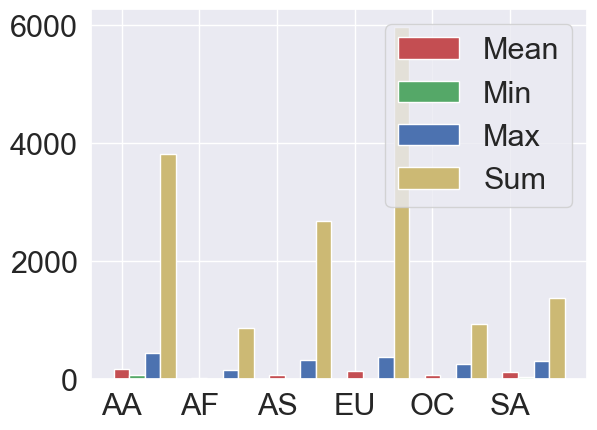

In [32]:
# 기타 대륙, 유럽, 남아메리카가 평균보다 많이 알코올을 섭취하는 것을 알 수 있다.

n_groups = len(result.index)
# 시각화
gr = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist() 

index = np.arange(n_groups)
bar_width = 0.2

bar1 = plt.bar(index, means, bar_width, color='r',label='Mean')
bar2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label='Min')
bar3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label = 'Max')
bar4 = plt.bar(index + bar_width * 3, sums, bar_width, color = 'y', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

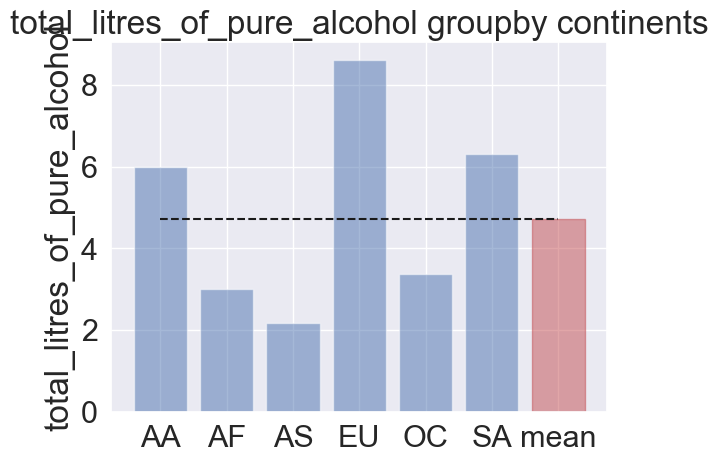

In [36]:
# 대륙별 total_litres_of_pure_alcohol 을 시각화 하기
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list =  plt.bar(x_pos,alcohol,align='center', alpha=0.5 )
bar_list[len(continents)-1].set_color('r')
plt.plot([0,6],[total_mean, total_mean], 'k--')
plt.xticks(x_pos , continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol groupby continents')

plt.show()